In [110]:
## Import Packages
import numpy as np
import scipy.stats as stats
import os
import pickle
import scipy.io as scio
from ncdump_python3 import ncdump
import pickle
from matplotlib import pyplot as plt
import Area_Avg as AA
from scipy.interpolate import griddata
from netCDF4 import Dataset
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [64]:
#Load in Dimensions
LLL = Dataset('LatLon.nc')
Lat = np.squeeze(LLL.variables['lat'])
Lon = np.squeeze(LLL.variables['lon'])
LLL.close()

Months = np.arange(0,12)
FP_Ensemble_Members = np.arange(0,5)

In [32]:
RCP45_Vars = pickle.load(open('RCP45_dFlux_Vars.pickle','rb'),encoding='latin1')
WAVD_Vars = pickle.load(open('WAVD_dFlux_Vars.pickle','rb'),encoding='latin1')

In [43]:
RCP45_Vars.keys()

dict_keys(['CLDMED', 'FLNS', 'SHFLX', 'CLDLOW', 'FLNSC', 'FLUTC', 'FLUT', 'FSNS', 'LHFLX', 'FSNT', 'CLDHGH', 'FSNSC', 'FSNTC'])

In [247]:
#net downward radiation at the TOA- subtract the upward longwave from the net shortwave
RCP45_TOAnet = RCP45_Vars['FSNT']+(-RCP45_Vars['FLUT'])
WAVD_TOAnet = WAVD_Vars['FSNT']+(-WAVD_Vars['FLUT'])

#net outgoing radiation from the surface 
RCP45_SFCnet =  (-RCP45_Vars['FSNS'])+\
                (RCP45_Vars['FLNS'])+\
                (RCP45_Vars['LHFLX'])+\
                (RCP45_Vars['SHFLX'])
WAVD_SFCnet =  (-WAVD_Vars['FSNS'])+\
               (WAVD_Vars['FLNS'])+\
               (WAVD_Vars['LHFLX'])+\
               (WAVD_Vars['SHFLX'])

In [248]:
RCP45_F_atmos = -(RCP45_TOAnet+RCP45_SFCnet)
WAVD_F_atmos = -(WAVD_TOAnet+WAVD_SFCnet)

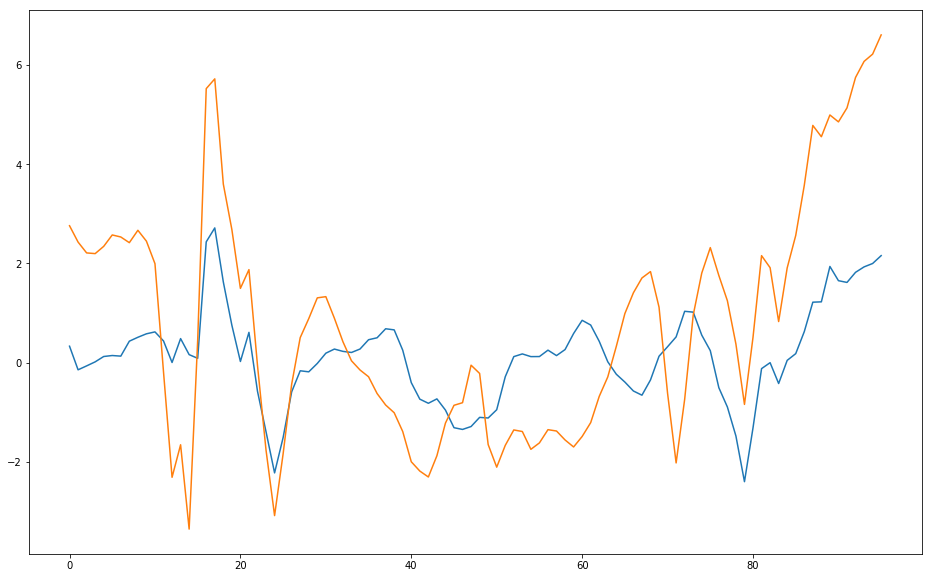

In [249]:
plt.figure(figsize=(16,10))
plt.plot(np.mean(RCP45_F_atmos,axis=(0,1,3)))
plt.plot(np.mean(WAVD_F_atmos,axis=(0,1,3)))

In [250]:
RCP45_F_atmos_MAM = np.mean(RCP45_F_atmos[:,2:5,:,:],axis=1)
RCP45_F_atmos_JJA = np.mean(RCP45_F_atmos[:,5:8,:,:],axis=1)
RCP45_F_atmos_SON = np.mean(RCP45_F_atmos[:,8:11,:,:],axis=1)
RCP45_F_atmos_DJF = np.mean((RCP45_F_atmos[:,0,:,:],RCP45_F_atmos[:,1,:,:],\
                             RCP45_F_atmos[:,11,:,:]),axis=0)
WAVD_F_atmos_MAM = np.mean(WAVD_F_atmos[:,2:5,:,:],axis=1)
WAVD_F_atmos_JJA = np.mean(WAVD_F_atmos[:,5:8,:,:],axis=1)
WAVD_F_atmos_SON = np.mean(WAVD_F_atmos[:,8:11,:,:],axis=1)
WAVD_F_atmos_DJF = np.mean((WAVD_F_atmos[:,0,:,:],WAVD_F_atmos[:,1,:,:],\
                             WAVD_F_atmos[:,11,:,:]),axis=0)

RCP45_F_atmos_ANN = np.mean(RCP45_F_atmos[:,:,:,:],axis=1)
WAVD_F_atmos_ANN = np.mean(WAVD_F_atmos[:,:,:,:],axis=1)

In [251]:
#area average
RCP45_F_atmos_MAM_AA = AA.LatLonavg_Time(RCP45_F_atmos_MAM[:,80:,:],Lat[80:],Lon)
RCP45_F_atmos_JJA_AA = AA.LatLonavg_Time(RCP45_F_atmos_JJA[:,80:,:],Lat[80:],Lon)
RCP45_F_atmos_SON_AA = AA.LatLonavg_Time(RCP45_F_atmos_SON[:,80:,:],Lat[80:],Lon)
RCP45_F_atmos_DJF_AA = AA.LatLonavg_Time(RCP45_F_atmos_DJF[:,80:,:],Lat[80:],Lon)
RCP45_F_atmos_ANN_AA = AA.LatLonavg_Time(RCP45_F_atmos_ANN[:,80:,:],Lat[80:],Lon)

WAVD_F_atmos_MAM_AA = AA.LatLonavg_Time(WAVD_F_atmos_MAM[:,80:,:],Lat[80:],Lon)
WAVD_F_atmos_JJA_AA = AA.LatLonavg_Time(WAVD_F_atmos_JJA[:,80:,:],Lat[80:],Lon)
WAVD_F_atmos_SON_AA = AA.LatLonavg_Time(WAVD_F_atmos_SON[:,80:,:],Lat[80:],Lon)
WAVD_F_atmos_DJF_AA = AA.LatLonavg_Time(WAVD_F_atmos_DJF[:,80:,:],Lat[80:],Lon)
WAVD_F_atmos_ANN_AA = AA.LatLonavg_Time(WAVD_F_atmos_ANN[:,80:,:],Lat[80:],Lon)

In [252]:
RCP45_F_atmos_MAM_GA = AA.LatLonavg_Time(RCP45_F_atmos_MAM[:,:,:],Lat[:],Lon)
RCP45_F_atmos_JJA_GA = AA.LatLonavg_Time(RCP45_F_atmos_JJA[:,:,:],Lat[:],Lon)
RCP45_F_atmos_SON_GA = AA.LatLonavg_Time(RCP45_F_atmos_SON[:,:,:],Lat[:],Lon)
RCP45_F_atmos_DJF_GA = AA.LatLonavg_Time(RCP45_F_atmos_DJF[:,:,:],Lat[:],Lon)
RCP45_F_atmos_ANN_GA = AA.LatLonavg_Time(RCP45_F_atmos_ANN[:,:,:],Lat[:],Lon)

WAVD_F_atmos_MAM_GA = AA.LatLonavg_Time(WAVD_F_atmos_MAM[:,:,:],Lat[:],Lon)
WAVD_F_atmos_JJA_GA = AA.LatLonavg_Time(WAVD_F_atmos_JJA[:,:,:],Lat[:],Lon)
WAVD_F_atmos_SON_GA = AA.LatLonavg_Time(WAVD_F_atmos_SON[:,:,:],Lat[:],Lon)
WAVD_F_atmos_DJF_GA = AA.LatLonavg_Time(WAVD_F_atmos_DJF[:,:,:],Lat[:],Lon)
WAVD_F_atmos_ANN_GA = AA.LatLonavg_Time(WAVD_F_atmos_ANN[:,:,:],Lat[:],Lon)

In [253]:
WAVD_dOHC_Annual_AA = pickle.load(open(\
"ENERGY BUDGET/Ocean Heat Content/wAVD/wAVD_OCN_EnergyB_AA.pickle","rb"))
WAVD_dOHC_SON_AA = pickle.load(open(\
"ENERGY BUDGET/Ocean Heat Content/wAVD/Seasonal Breakdown/wAVD_OCN_EnergyB_SON_AA.pickle","rb"))
WAVD_dOHC_MAM_AA = pickle.load(open(\
"ENERGY BUDGET/Ocean Heat Content/wAVD/Seasonal Breakdown/wAVD_OCN_EnergyB_MAM_AA.pickle","rb"))
WAVD_dOHC_JJA_AA = pickle.load(open(\
"ENERGY BUDGET/Ocean Heat Content/wAVD/Seasonal Breakdown/wAVD_OCN_EnergyB_JJA_AA.pickle","rb"))
WAVD_dOHC_DJF_AA = pickle.load(open(\
"ENERGY BUDGET/Ocean Heat Content/wAVD/Seasonal Breakdown/wAVD_OCN_EnergyB_DJF_AA.pickle","rb"))

WAVD_dOHC_Annual_GA = pickle.load(open(\
"ENERGY BUDGET/Ocean Heat Content/wAVD/wAVD_OCN_EnergyB_GA.pickle","rb"))
WAVD_dOHC_SON_GA = pickle.load(open(\
"ENERGY BUDGET/Ocean Heat Content/wAVD/Seasonal Breakdown/wAVD_OCN_EnergyB_SON_GA.pickle","rb"))
WAVD_dOHC_MAM_GA = pickle.load(open(\
"ENERGY BUDGET/Ocean Heat Content/wAVD/Seasonal Breakdown/wAVD_OCN_EnergyB_MAM_GA.pickle","rb"))
WAVD_dOHC_JJA_GA = pickle.load(open(\
"ENERGY BUDGET/Ocean Heat Content/wAVD/Seasonal Breakdown/wAVD_OCN_EnergyB_JJA_GA.pickle","rb"))
WAVD_dOHC_DJF_GA = pickle.load(open(\
"ENERGY BUDGET/Ocean Heat Content/wAVD/Seasonal Breakdown/wAVD_OCN_EnergyB_DJF_GA.pickle","rb"))

In [254]:
RCP45_dOHC_Annual_AA = pickle.load(open(\
"ENERGY BUDGET/Ocean Heat Content/RCP45/RCP45_OCN_EnergyB_AA.pickle","rb"))
RCP45_dOHC_SON_AA = pickle.load(open(\
"ENERGY BUDGET/Ocean Heat Content/RCP45/Seasonal Breakdown/RCP45_OCN_EnergyB_SON_AA.pickle","rb"))
RCP45_dOHC_MAM_AA = pickle.load(open(\
"ENERGY BUDGET/Ocean Heat Content/RCP45/Seasonal Breakdown/RCP45_OCN_EnergyB_MAM_AA.pickle","rb"))
RCP45_dOHC_JJA_AA = pickle.load(open(\
"ENERGY BUDGET/Ocean Heat Content/RCP45/Seasonal Breakdown/RCP45_OCN_EnergyB_JJA_AA.pickle","rb"))
RCP45_dOHC_DJF_AA = pickle.load(open(\
"ENERGY BUDGET/Ocean Heat Content/RCP45/Seasonal Breakdown/RCP45_OCN_EnergyB_DJF_AA.pickle","rb"))

RCP45_dOHC_Annual_GA = pickle.load(open(\
"ENERGY BUDGET/Ocean Heat Content/RCP45/RCP45_OCN_EnergyB_GA.pickle","rb"))
RCP45_dOHC_SON_GA = pickle.load(open(\
"ENERGY BUDGET/Ocean Heat Content/RCP45/Seasonal Breakdown/RCP45_OCN_EnergyB_SON_GA.pickle","rb"))
RCP45_dOHC_MAM_GA = pickle.load(open(\
"ENERGY BUDGET/Ocean Heat Content/RCP45/Seasonal Breakdown/RCP45_OCN_EnergyB_MAM_GA.pickle","rb"))
RCP45_dOHC_JJA_GA = pickle.load(open(\
"ENERGY BUDGET/Ocean Heat Content/RCP45/Seasonal Breakdown/RCP45_OCN_EnergyB_JJA_GA.pickle","rb"))
RCP45_dOHC_DJF_GA = pickle.load(open(\
"ENERGY BUDGET/Ocean Heat Content/RCP45/Seasonal Breakdown/RCP45_OCN_EnergyB_DJF_GA.pickle","rb"))

In [255]:
RCP45_TOAnet_MAM = np.mean(RCP45_TOAnet[:,2:5,:,:],axis=1)
RCP45_TOAnet_JJA = np.mean(RCP45_TOAnet[:,5:8,:,:],axis=1)
RCP45_TOAnet_SON = np.mean(RCP45_TOAnet[:,8:11,:,:],axis=1)
RCP45_TOAnet_DJF = np.mean((RCP45_TOAnet[:,0,:,:],RCP45_TOAnet[:,1,:,:],\
                             RCP45_TOAnet[:,11,:,:]),axis=0)
WAVD_TOAnet_MAM = np.mean(WAVD_TOAnet[:,2:5,:,:],axis=1)
WAVD_TOAnet_JJA = np.mean(WAVD_TOAnet[:,5:8,:,:],axis=1)
WAVD_TOAnet_SON = np.mean(WAVD_TOAnet[:,8:11,:,:],axis=1)
WAVD_TOAnet_DJF = np.mean((WAVD_TOAnet[:,0,:,:],WAVD_TOAnet[:,1,:,:],\
                             WAVD_TOAnet[:,11,:,:]),axis=0)

RCP45_TOAnet_ANN = np.mean(RCP45_TOAnet[:,:,:,:],axis=1)
WAVD_TOAnet_ANN = np.mean(WAVD_TOAnet[:,:,:,:],axis=1)

In [256]:
#area average
RCP45_TOAnet_MAM_AA = AA.LatLonavg_Time(RCP45_TOAnet_MAM[:,80:,:],Lat[80:],Lon)
RCP45_TOAnet_JJA_AA = AA.LatLonavg_Time(RCP45_TOAnet_JJA[:,80:,:],Lat[80:],Lon)
RCP45_TOAnet_SON_AA = AA.LatLonavg_Time(RCP45_TOAnet_SON[:,80:,:],Lat[80:],Lon)
RCP45_TOAnet_DJF_AA = AA.LatLonavg_Time(RCP45_TOAnet_DJF[:,80:,:],Lat[80:],Lon)
RCP45_TOAnet_ANN_AA = AA.LatLonavg_Time(RCP45_TOAnet_ANN[:,80:,:],Lat[80:],Lon)

WAVD_TOAnet_MAM_AA = AA.LatLonavg_Time(WAVD_TOAnet_MAM[:,80:,:],Lat[80:],Lon)
WAVD_TOAnet_JJA_AA = AA.LatLonavg_Time(WAVD_TOAnet_JJA[:,80:,:],Lat[80:],Lon)
WAVD_TOAnet_SON_AA = AA.LatLonavg_Time(WAVD_TOAnet_SON[:,80:,:],Lat[80:],Lon)
WAVD_TOAnet_DJF_AA = AA.LatLonavg_Time(WAVD_TOAnet_DJF[:,80:,:],Lat[80:],Lon)
WAVD_TOAnet_ANN_AA = AA.LatLonavg_Time(WAVD_TOAnet_ANN[:,80:,:],Lat[80:],Lon)

RCP45_TOAnet_MAM_GA = AA.LatLonavg_Time(RCP45_TOAnet_MAM[:,:,:],Lat[:],Lon)
RCP45_TOAnet_JJA_GA = AA.LatLonavg_Time(RCP45_TOAnet_JJA[:,:,:],Lat[:],Lon)
RCP45_TOAnet_SON_GA = AA.LatLonavg_Time(RCP45_TOAnet_SON[:,:,:],Lat[:],Lon)
RCP45_TOAnet_DJF_GA = AA.LatLonavg_Time(RCP45_TOAnet_DJF[:,:,:],Lat[:],Lon)
RCP45_TOAnet_ANN_GA = AA.LatLonavg_Time(RCP45_TOAnet_ANN[:,:,:],Lat[:],Lon)

WAVD_TOAnet_MAM_GA = AA.LatLonavg_Time(WAVD_TOAnet_MAM[:,:,:],Lat[:],Lon)
WAVD_TOAnet_JJA_GA = AA.LatLonavg_Time(WAVD_TOAnet_JJA[:,:,:],Lat[:],Lon)
WAVD_TOAnet_SON_GA = AA.LatLonavg_Time(WAVD_TOAnet_SON[:,:,:],Lat[:],Lon)
WAVD_TOAnet_DJF_GA = AA.LatLonavg_Time(WAVD_TOAnet_DJF[:,:,:],Lat[:],Lon)
WAVD_TOAnet_ANN_GA = AA.LatLonavg_Time(WAVD_TOAnet_ANN[:,:,:],Lat[:],Lon)

In [257]:
RCP45_F_total_MAM_AA = -(RCP45_TOAnet_MAM_AA-RCP45_dOHC_MAM_AA)
RCP45_F_total_JJA_AA = -(RCP45_TOAnet_JJA_AA-RCP45_dOHC_JJA_AA)
RCP45_F_total_SON_AA = -(RCP45_TOAnet_SON_AA-RCP45_dOHC_SON_AA)
RCP45_F_total_DJF_AA = -(RCP45_TOAnet_DJF_AA-RCP45_dOHC_DJF_AA)
RCP45_F_total_ANN_AA = -(RCP45_TOAnet_ANN_AA-RCP45_dOHC_Annual_AA)

WAVD_F_total_MAM_AA = -(WAVD_TOAnet_MAM_AA-WAVD_dOHC_MAM_AA)
WAVD_F_total_JJA_AA = -(WAVD_TOAnet_JJA_AA-WAVD_dOHC_JJA_AA)
WAVD_F_total_SON_AA = -(WAVD_TOAnet_SON_AA-WAVD_dOHC_SON_AA)
WAVD_F_total_DJF_AA = -(WAVD_TOAnet_DJF_AA-WAVD_dOHC_DJF_AA)
WAVD_F_total_ANN_AA = -(WAVD_TOAnet_ANN_AA-WAVD_dOHC_Annual_AA)

In [258]:
RCP45_F_total_MAM_GA = -(RCP45_TOAnet_MAM_GA-RCP45_dOHC_MAM_GA)
RCP45_F_total_JJA_GA = -(RCP45_TOAnet_JJA_GA-RCP45_dOHC_JJA_GA)
RCP45_F_total_SON_GA = -(RCP45_TOAnet_SON_GA-RCP45_dOHC_SON_GA)
RCP45_F_total_DJF_GA = -(RCP45_TOAnet_DJF_GA-RCP45_dOHC_DJF_GA)
RCP45_F_total_ANN_GA = -(RCP45_TOAnet_ANN_GA-RCP45_dOHC_Annual_GA)

WAVD_F_total_MAM_GA = -(WAVD_TOAnet_MAM_GA-WAVD_dOHC_MAM_GA)
WAVD_F_total_JJA_GA = -(WAVD_TOAnet_JJA_GA-WAVD_dOHC_JJA_GA)
WAVD_F_total_SON_GA = -(WAVD_TOAnet_SON_GA-WAVD_dOHC_SON_GA)
WAVD_F_total_DJF_GA = -(WAVD_TOAnet_DJF_GA-WAVD_dOHC_DJF_GA)
WAVD_F_total_ANN_GA = -(WAVD_TOAnet_ANN_GA-WAVD_dOHC_Annual_GA)

In [259]:
RCP45_F_ocn_MAM_AA = RCP45_F_total_MAM_AA-RCP45_F_atmos_MAM_AA
RCP45_F_ocn_JJA_AA = RCP45_F_total_JJA_AA-RCP45_F_atmos_JJA_AA
RCP45_F_ocn_SON_AA = RCP45_F_total_SON_AA-RCP45_F_atmos_SON_AA
RCP45_F_ocn_DJF_AA = RCP45_F_total_DJF_AA-RCP45_F_atmos_DJF_AA
RCP45_F_ocn_ANN_AA = RCP45_F_total_ANN_AA-RCP45_F_atmos_ANN_AA

WAVD_F_ocn_MAM_AA = WAVD_F_total_MAM_AA-WAVD_F_atmos_MAM_AA
WAVD_F_ocn_JJA_AA = WAVD_F_total_JJA_AA-WAVD_F_atmos_JJA_AA
WAVD_F_ocn_SON_AA = WAVD_F_total_SON_AA-WAVD_F_atmos_SON_AA
WAVD_F_ocn_DJF_AA = WAVD_F_total_DJF_AA-WAVD_F_atmos_DJF_AA
WAVD_F_ocn_ANN_AA = WAVD_F_total_ANN_AA-WAVD_F_atmos_ANN_AA

In [260]:
print('RCP45 Poleward Total Energy Flux :',np.mean(RCP45_F_total_ANN_AA))
print('WAVD Poleward Total Energy Flux :',np.mean(WAVD_F_total_ANN_AA),'\n')
print('RCP45 Poleward Atmosphere Energy Flux :',np.mean(RCP45_F_atmos_ANN_AA))
print('WAVD Poleward Atmosphere Energy Flux :',np.mean(WAVD_F_atmos_ANN_AA),'\n')
print('RCP45 Poleward Ocean Energy Flux :',np.mean(RCP45_F_ocn_ANN_AA))
print('WAVD Poleward Ocean Energy Flux :',np.mean(WAVD_F_ocn_ANN_AA))

RCP45 Poleward Total Energy Flux : 0.15585066200977124
WAVD Poleward Total Energy Flux : 2.1040720785697564 

RCP45 Poleward Atmosphere Energy Flux : 0.32291821009243366
WAVD Poleward Atmosphere Energy Flux : 2.784259517457055 

RCP45 Poleward Ocean Energy Flux : -0.1670675480826624
WAVD Poleward Ocean Energy Flux : -0.6801874388872984


In [261]:
RCP45_dST = pickle.load(open(\
    "Future Projection CC Responses/RCP45_dST.pickle","rb"),encoding='latin1')

WAVD_dST = pickle.load(open(\
    "Future Projection CC Responses/WAVD_dST.pickle","rb"),encoding='latin1')

In [267]:
RCP45_dST_MAM = np.mean(RCP45_dST[:,2:5,:,:],axis=1)
RCP45_dST_JJA = np.mean(RCP45_dST[:,5:8,:,:],axis=1)
RCP45_dST_SON = np.mean(RCP45_dST[:,8:11,:,:],axis=1)
RCP45_dST_DJF = np.mean((RCP45_dST[:,0,:,:],RCP45_dST[:,1,:,:],\
                             RCP45_dST[:,11,:,:]),axis=0)
WAVD_dST_MAM = np.mean(WAVD_dST[:,2:5,:,:],axis=1)
WAVD_dST_JJA = np.mean(WAVD_dST[:,5:8,:,:],axis=1)
WAVD_dST_SON = np.mean(WAVD_dST[:,8:11,:,:],axis=1)
WAVD_dST_DJF = np.mean((WAVD_dST[:,0,:,:],WAVD_dST[:,1,:,:],\
                             WAVD_dST[:,11,:,:]),axis=0)
RCP45_dST_ANN = np.mean(RCP45_dST[:,:,:,:],axis=1)
WAVD_dST_ANN = np.mean(WAVD_dST[:,:,:,:],axis=1)

In [271]:
RCP45_dST_MAM_AA = AA.LatLonavg_Time(RCP45_dST_MAM[:,80:,:],Lat[80:],Lon)
RCP45_dST_JJA_AA = AA.LatLonavg_Time(RCP45_dST_JJA[:,80:,:],Lat[80:],Lon)
RCP45_dST_SON_AA = AA.LatLonavg_Time(RCP45_dST_SON[:,80:,:],Lat[80:],Lon)
RCP45_dST_DJF_AA = AA.LatLonavg_Time(RCP45_dST_DJF[:,80:,:],Lat[80:],Lon)
RCP45_dST_ANN_AA = AA.LatLonavg_Time(RCP45_dST_ANN[:,80:,:],Lat[80:],Lon)

WAVD_dST_MAM_AA = AA.LatLonavg_Time(WAVD_dST_MAM[:,80:,:],Lat[80:],Lon)
WAVD_dST_JJA_AA = AA.LatLonavg_Time(WAVD_dST_JJA[:,80:,:],Lat[80:],Lon)
WAVD_dST_SON_AA = AA.LatLonavg_Time(WAVD_dST_SON[:,80:,:],Lat[80:],Lon)
WAVD_dST_DJF_AA = AA.LatLonavg_Time(WAVD_dST_DJF[:,80:,:],Lat[80:],Lon)
WAVD_dST_ANN_AA = AA.LatLonavg_Time(WAVD_dST_ANN[:,80:,:],Lat[80:],Lon)

In [280]:
#feedbacks

RCP45_F_atmos_feedback_MAM_AA = RCP45_F_atmos_MAM_AA/RCP45_dST_MAM_AA
RCP45_F_atmos_feedback_JJA_AA = RCP45_F_atmos_JJA_AA/RCP45_dST_JJA_AA
RCP45_F_atmos_feedback_SON_AA = RCP45_F_atmos_SON_AA/RCP45_dST_SON_AA
RCP45_F_atmos_feedback_DJF_AA = RCP45_F_atmos_DJF_AA/RCP45_dST_DJF_AA
RCP45_F_atmos_feedback_ANN_AA = RCP45_F_atmos_ANN_AA/RCP45_dST_ANN_AA

WAVD_F_atmos_feedback_MAM_AA = WAVD_F_atmos_MAM_AA/WAVD_dST_MAM_AA
WAVD_F_atmos_feedback_JJA_AA = WAVD_F_atmos_JJA_AA/WAVD_dST_JJA_AA
WAVD_F_atmos_feedback_SON_AA = WAVD_F_atmos_SON_AA/WAVD_dST_SON_AA
WAVD_F_atmos_feedback_DJF_AA = WAVD_F_atmos_DJF_AA/WAVD_dST_DJF_AA
WAVD_F_atmos_feedback_ANN_AA = WAVD_F_atmos_ANN_AA/WAVD_dST_ANN_AA

RCP45_F_ocn_feedback_MAM_AA = RCP45_F_ocn_MAM_AA/RCP45_dST_MAM_AA
RCP45_F_ocn_feedback_JJA_AA = RCP45_F_ocn_JJA_AA/RCP45_dST_JJA_AA
RCP45_F_ocn_feedback_SON_AA = RCP45_F_ocn_SON_AA/RCP45_dST_SON_AA
RCP45_F_ocn_feedback_DJF_AA = RCP45_F_ocn_DJF_AA/RCP45_dST_DJF_AA
RCP45_F_ocn_feedback_ANN_AA = RCP45_F_ocn_ANN_AA/RCP45_dST_ANN_AA

WAVD_F_ocn_feedback_MAM_AA = WAVD_F_ocn_MAM_AA/WAVD_dST_MAM_AA
WAVD_F_ocn_feedback_JJA_AA = WAVD_F_ocn_JJA_AA/WAVD_dST_JJA_AA
WAVD_F_ocn_feedback_SON_AA = WAVD_F_ocn_SON_AA/WAVD_dST_SON_AA
WAVD_F_ocn_feedback_DJF_AA = WAVD_F_ocn_DJF_AA/WAVD_dST_DJF_AA
WAVD_F_ocn_feedback_ANN_AA = WAVD_F_ocn_ANN_AA/WAVD_dST_ANN_AA

In [286]:
#save feedbacks to files

RCP45_F_atmos_ANN_AA_file = open("RCP45_DYNatmos_EnergyB_AA.pickle","wb")
pickle.dump(RCP45_F_atmos_ANN_AA,RCP45_F_atmos_ANN_AA_file)
RCP45_F_atmos_ANN_AA_file.close()

RCP45_F_atmos_MAM_AA_file = open("RCP45_DYNatmos_EnergyB_MAM_AA.pickle","wb")
pickle.dump(RCP45_F_atmos_MAM_AA,RCP45_F_atmos_MAM_AA_file)
RCP45_F_atmos_MAM_AA_file.close()

RCP45_F_atmos_JJA_AA_file = open("RCP45_DYNatmos_EnergyB_JJA_AA.pickle","wb")
pickle.dump(RCP45_F_atmos_JJA_AA,RCP45_F_atmos_JJA_AA_file)
RCP45_F_atmos_JJA_AA_file.close()

RCP45_F_atmos_SON_AA_file = open("RCP45_DYNatmos_EnergyB_SON_AA.pickle","wb")
pickle.dump(RCP45_F_atmos_SON_AA,RCP45_F_atmos_SON_AA_file)
RCP45_F_atmos_SON_AA_file.close()

RCP45_F_atmos_DJF_AA_file = open("RCP45_DYNatmos_EnergyB_DJF_AA.pickle","wb")
pickle.dump(RCP45_F_atmos_DJF_AA,RCP45_F_atmos_DJF_AA_file)
RCP45_F_atmos_DJF_AA_file.close()

RCP45_F_atmos_feedback_ANN_AA_file = open("RCP45_DYNatmos_Feedback_AA.pickle","wb")
pickle.dump(RCP45_F_atmos_feedback_ANN_AA,RCP45_F_atmos_feedback_ANN_AA_file)
RCP45_F_atmos_feedback_ANN_AA_file.close()

RCP45_F_atmos_feedback_MAM_AA_file = open("RCP45_DYNatmos_Feedback_MAM_AA.pickle","wb")
pickle.dump(RCP45_F_atmos_feedback_MAM_AA,RCP45_F_atmos_feedback_MAM_AA_file)
RCP45_F_atmos_feedback_MAM_AA_file.close()

RCP45_F_atmos_feedback_JJA_AA_file = open("RCP45_DYNatmos_Feedback_JJA_AA.pickle","wb")
pickle.dump(RCP45_F_atmos_feedback_JJA_AA,RCP45_F_atmos_feedback_JJA_AA_file)
RCP45_F_atmos_feedback_JJA_AA_file.close()

RCP45_F_atmos_feedback_SON_AA_file = open("RCP45_DYNatmos_Feedback_SON_AA.pickle","wb")
pickle.dump(RCP45_F_atmos_feedback_SON_AA,RCP45_F_atmos_feedback_SON_AA_file)
RCP45_F_atmos_feedback_SON_AA_file.close()

RCP45_F_atmos_feedback_DJF_AA_file = open("RCP45_DYNatmos_Feedback_DJF_AA.pickle","wb")
pickle.dump(RCP45_F_atmos_feedback_DJF_AA,RCP45_F_atmos_feedback_DJF_AA_file)
RCP45_F_atmos_feedback_DJF_AA_file.close()

In [287]:
#save feedbacks to files

WAVD_F_atmos_ANN_AA_file = open("wAVD_DYNatmos_EnergyB_AA.pickle","wb")
pickle.dump(WAVD_F_atmos_ANN_AA,WAVD_F_atmos_ANN_AA_file)
WAVD_F_atmos_ANN_AA_file.close()

WAVD_F_atmos_MAM_AA_file = open("wAVD_DYNatmos_EnergyB_MAM_AA.pickle","wb")
pickle.dump(WAVD_F_atmos_MAM_AA,WAVD_F_atmos_MAM_AA_file)
WAVD_F_atmos_MAM_AA_file.close()

WAVD_F_atmos_JJA_AA_file = open("wAVD_DYNatmos_EnergyB_JJA_AA.pickle","wb")
pickle.dump(WAVD_F_atmos_JJA_AA,WAVD_F_atmos_JJA_AA_file)
WAVD_F_atmos_JJA_AA_file.close()

WAVD_F_atmos_SON_AA_file = open("wAVD_DYNatmos_EnergyB_SON_AA.pickle","wb")
pickle.dump(WAVD_F_atmos_SON_AA,WAVD_F_atmos_SON_AA_file)
WAVD_F_atmos_SON_AA_file.close()

WAVD_F_atmos_DJF_AA_file = open("wAVD_DYNatmos_EnergyB_DJF_AA.pickle","wb")
pickle.dump(WAVD_F_atmos_DJF_AA,WAVD_F_atmos_DJF_AA_file)
WAVD_F_atmos_DJF_AA_file.close()

WAVD_F_atmos_feedback_ANN_AA_file = open("wAVD_DYNatmos_Feedback_AA.pickle","wb")
pickle.dump(WAVD_F_atmos_feedback_ANN_AA,WAVD_F_atmos_feedback_ANN_AA_file)
WAVD_F_atmos_feedback_ANN_AA_file.close()

WAVD_F_atmos_feedback_MAM_AA_file = open("wAVD_DYNatmos_Feedback_MAM_AA.pickle","wb")
pickle.dump(WAVD_F_atmos_feedback_MAM_AA,WAVD_F_atmos_feedback_MAM_AA_file)
WAVD_F_atmos_feedback_MAM_AA_file.close()

WAVD_F_atmos_feedback_JJA_AA_file = open("wAVD_DYNatmos_Feedback_JJA_AA.pickle","wb")
pickle.dump(WAVD_F_atmos_feedback_JJA_AA,WAVD_F_atmos_feedback_JJA_AA_file)
WAVD_F_atmos_feedback_JJA_AA_file.close()

WAVD_F_atmos_feedback_SON_AA_file = open("wAVD_DYNatmos_Feedback_SON_AA.pickle","wb")
pickle.dump(WAVD_F_atmos_feedback_SON_AA,WAVD_F_atmos_feedback_SON_AA_file)
WAVD_F_atmos_feedback_SON_AA_file.close()

WAVD_F_atmos_feedback_DJF_AA_file = open("wAVD_DYNatmos_Feedback_DJF_AA.pickle","wb")
pickle.dump(WAVD_F_atmos_feedback_DJF_AA,WAVD_F_atmos_feedback_DJF_AA_file)
WAVD_F_atmos_feedback_DJF_AA_file.close()

In [288]:
#save feedbacks to files

RCP45_F_ocn_ANN_AA_file = open("RCP45_DYNocn_EnergyB_AA.pickle","wb")
pickle.dump(RCP45_F_ocn_ANN_AA,RCP45_F_ocn_ANN_AA_file)
RCP45_F_ocn_ANN_AA_file.close()

RCP45_F_ocn_MAM_AA_file = open("RCP45_DYNocn_EnergyB_MAM_AA.pickle","wb")
pickle.dump(RCP45_F_ocn_MAM_AA,RCP45_F_ocn_MAM_AA_file)
RCP45_F_ocn_MAM_AA_file.close()

RCP45_F_ocn_JJA_AA_file = open("RCP45_DYNocn_EnergyB_JJA_AA.pickle","wb")
pickle.dump(RCP45_F_ocn_JJA_AA,RCP45_F_ocn_JJA_AA_file)
RCP45_F_ocn_JJA_AA_file.close()

RCP45_F_ocn_SON_AA_file = open("RCP45_DYNocn_EnergyB_SON_AA.pickle","wb")
pickle.dump(RCP45_F_ocn_SON_AA,RCP45_F_ocn_SON_AA_file)
RCP45_F_ocn_SON_AA_file.close()

RCP45_F_ocn_DJF_AA_file = open("RCP45_DYNocn_EnergyB_DJF_AA.pickle","wb")
pickle.dump(RCP45_F_ocn_DJF_AA,RCP45_F_ocn_DJF_AA_file)
RCP45_F_ocn_DJF_AA_file.close()

RCP45_F_ocn_feedback_ANN_AA_file = open("RCP45_DYNocn_Feedback_AA.pickle","wb")
pickle.dump(RCP45_F_ocn_feedback_ANN_AA,RCP45_F_ocn_feedback_ANN_AA_file)
RCP45_F_ocn_feedback_ANN_AA_file.close()

RCP45_F_ocn_feedback_MAM_AA_file = open("RCP45_DYNocn_Feedback_MAM_AA.pickle","wb")
pickle.dump(RCP45_F_ocn_feedback_MAM_AA,RCP45_F_ocn_feedback_MAM_AA_file)
RCP45_F_ocn_feedback_MAM_AA_file.close()

RCP45_F_ocn_feedback_JJA_AA_file = open("RCP45_DYNocn_Feedback_JJA_AA.pickle","wb")
pickle.dump(RCP45_F_ocn_feedback_JJA_AA,RCP45_F_ocn_feedback_JJA_AA_file)
RCP45_F_ocn_feedback_JJA_AA_file.close()

RCP45_F_ocn_feedback_SON_AA_file = open("RCP45_DYNocn_Feedback_SON_AA.pickle","wb")
pickle.dump(RCP45_F_ocn_feedback_SON_AA,RCP45_F_ocn_feedback_SON_AA_file)
RCP45_F_ocn_feedback_SON_AA_file.close()

RCP45_F_ocn_feedback_DJF_AA_file = open("RCP45_DYNocn_Feedback_DJF_AA.pickle","wb")
pickle.dump(RCP45_F_ocn_feedback_DJF_AA,RCP45_F_ocn_feedback_DJF_AA_file)
RCP45_F_ocn_feedback_DJF_AA_file.close()

In [289]:
#save feedbacks to files

WAVD_F_ocn_ANN_AA_file = open("wAVD_DYNocn_EnergyB_AA.pickle","wb")
pickle.dump(WAVD_F_ocn_ANN_AA,WAVD_F_ocn_ANN_AA_file)
WAVD_F_ocn_ANN_AA_file.close()

WAVD_F_ocn_MAM_AA_file = open("wAVD_DYNocn_EnergyB_MAM_AA.pickle","wb")
pickle.dump(WAVD_F_ocn_MAM_AA,WAVD_F_ocn_MAM_AA_file)
WAVD_F_ocn_MAM_AA_file.close()

WAVD_F_ocn_JJA_AA_file = open("wAVD_DYNocn_EnergyB_JJA_AA.pickle","wb")
pickle.dump(WAVD_F_ocn_JJA_AA,WAVD_F_ocn_JJA_AA_file)
WAVD_F_ocn_JJA_AA_file.close()

WAVD_F_ocn_SON_AA_file = open("wAVD_DYNocn_EnergyB_SON_AA.pickle","wb")
pickle.dump(WAVD_F_ocn_SON_AA,WAVD_F_ocn_SON_AA_file)
WAVD_F_ocn_SON_AA_file.close()

WAVD_F_ocn_DJF_AA_file = open("wAVD_DYNocn_EnergyB_DJF_AA.pickle","wb")
pickle.dump(WAVD_F_ocn_DJF_AA,WAVD_F_ocn_DJF_AA_file)
WAVD_F_ocn_DJF_AA_file.close()

WAVD_F_ocn_feedback_ANN_AA_file = open("wAVD_DYNocn_Feedback_AA.pickle","wb")
pickle.dump(WAVD_F_ocn_feedback_ANN_AA,WAVD_F_ocn_feedback_ANN_AA_file)
WAVD_F_ocn_feedback_ANN_AA_file.close()

WAVD_F_ocn_feedback_MAM_AA_file = open("wAVD_DYNocn_Feedback_MAM_AA.pickle","wb")
pickle.dump(WAVD_F_ocn_feedback_MAM_AA,WAVD_F_ocn_feedback_MAM_AA_file)
WAVD_F_ocn_feedback_MAM_AA_file.close()

WAVD_F_ocn_feedback_JJA_AA_file = open("wAVD_DYNocn_Feedback_JJA_AA.pickle","wb")
pickle.dump(WAVD_F_ocn_feedback_JJA_AA,WAVD_F_ocn_feedback_JJA_AA_file)
WAVD_F_ocn_feedback_JJA_AA_file.close()

WAVD_F_ocn_feedback_SON_AA_file = open("wAVD_DYNocn_Feedback_SON_AA.pickle","wb")
pickle.dump(WAVD_F_ocn_feedback_SON_AA,WAVD_F_ocn_feedback_SON_AA_file)
WAVD_F_ocn_feedback_SON_AA_file.close()

WAVD_F_ocn_feedback_DJF_AA_file = open("wAVD_DYNocn_Feedback_DJF_AA.pickle","wb")
pickle.dump(WAVD_F_ocn_feedback_DJF_AA,WAVD_F_ocn_feedback_DJF_AA_file)
WAVD_F_ocn_feedback_DJF_AA_file.close()